In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')
print(train_data.shape)
train_data.head()

(10147, 27)


,customer_id,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,258868,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),1d,Male,21,...,1~3,4~8,4~8,never,1,1,0,0,1,1
1,318369,Work,Alone,Sunny,80,7AM,Restaurant(<20),2h,Male,21,...,1~3,4~8,1~3,less1,1,0,0,1,0,0
2,320906,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,2h,Female,21,...,gt8,4~8,1~3,1~3,1,1,0,0,1,0
3,412393,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,26,...,less1,4~8,1~3,never,1,1,1,0,1,0
4,290854,Home,Alone,Snowy,30,6PM,Coffee House,1d,Male,31,...,less1,4~8,less1,never,1,1,0,0,1,0


In [3]:
test_data = pd.read_csv('test.csv')
print(test_data.shape)
test_data.head()

(2537, 26)


,customer_id,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,374679,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,1d,Female,below21,...,never,1~3,less1,4~8,less1,1,0,0,0,1
1,469678,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,21,...,1~3,never,gt8,4~8,1~3,1,1,0,1,0
2,216140,No Urgent Place,Alone,Rainy,55,10AM,Coffee House,1d,Female,26,...,never,never,1~3,less1,never,1,1,0,0,1
3,184301,No Urgent Place,Partner,Sunny,80,6PM,Bar,1d,Male,50plus,...,never,4~8,4~8,1~3,less1,1,1,0,0,1
4,148720,Work,Alone,Sunny,30,7AM,Carry out & Take away,1d,Female,26,...,never,never,1~3,4~8,less1,1,1,0,0,1


In [4]:
#no of Features is 26 and Target Column is Y
target_col = 'Y'
len(train_data.columns.drop(target_col))

26

<AxesSubplot:ylabel='Y'>

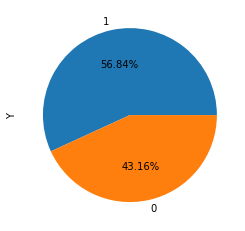

In [5]:
#Target Feature is Y
train_data.Y.value_counts().plot.pie(autopct = '%.2f%%')

In [6]:
#Datatype of all features in X
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           10147 non-null  int64 
 1   destination           10147 non-null  object
 2   passanger             10147 non-null  object
 3   weather               10147 non-null  object
 4   temperature           10147 non-null  int64 
 5   time                  10147 non-null  object
 6   coupon                10147 non-null  object
 7   expiration            10147 non-null  object
 8   gender                10147 non-null  object
 9   age                   10147 non-null  object
 10  maritalStatus         10147 non-null  object
 11  has_children          10147 non-null  int64 
 12  education             10147 non-null  object
 13  occupation            10147 non-null  object
 14  income                10147 non-null  object
 15  car                   84 non-null   

In [7]:
# Time converting to Integer values by using date time format
train_data['time'] = pd.to_datetime(train_data['time'],format = '%I%p').dt.hour
test_data['time'] = pd.to_datetime(test_data['time'],format = '%I%p').dt.hour

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           10147 non-null  int64 
 1   destination           10147 non-null  object
 2   passanger             10147 non-null  object
 3   weather               10147 non-null  object
 4   temperature           10147 non-null  int64 
 5   time                  10147 non-null  int64 
 6   coupon                10147 non-null  object
 7   expiration            10147 non-null  object
 8   gender                10147 non-null  object
 9   age                   10147 non-null  object
 10  maritalStatus         10147 non-null  object
 11  has_children          10147 non-null  int64 
 12  education             10147 non-null  object
 13  occupation            10147 non-null  object
 14  income                10147 non-null  object
 15  car                   84 non-null   

In [9]:
# drop the Car column because it has less then 1% values only
train_data.drop(columns = 'car', inplace = True)
test_data.drop(columns = 'car', inplace = True)

In [10]:
#Fill Null values using mode method
train_data.update(train_data['Bar'].fillna(train_data['Bar'].mode()[0]))
train_data.update(train_data['CoffeeHouse'].fillna(train_data['CoffeeHouse'].mode()[0]))
train_data.update(train_data['CarryAway'].fillna(train_data['CarryAway'].mode()[0]))
train_data.update(train_data['RestaurantLessThan20'].fillna(train_data['RestaurantLessThan20'].mode()[0]))
train_data.update(train_data['Restaurant20To50'].fillna(train_data['Restaurant20To50'].mode()[0]))
test_data.update(test_data['Bar'].fillna(test_data['Bar'].mode()[0]))
test_data.update(test_data['CoffeeHouse'].fillna(test_data['CoffeeHouse'].mode()[0]))
test_data.update(test_data['CarryAway'].fillna(test_data['CarryAway'].mode()[0]))
test_data.update(test_data['RestaurantLessThan20'].fillna(test_data['RestaurantLessThan20'].mode()[0]))
test_data.update(test_data['Restaurant20To50'].fillna(test_data['Restaurant20To50'].mode()[0]))

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           10147 non-null  int64 
 1   destination           10147 non-null  object
 2   passanger             10147 non-null  object
 3   weather               10147 non-null  object
 4   temperature           10147 non-null  int64 
 5   time                  10147 non-null  int64 
 6   coupon                10147 non-null  object
 7   expiration            10147 non-null  object
 8   gender                10147 non-null  object
 9   age                   10147 non-null  object
 10  maritalStatus         10147 non-null  object
 11  has_children          10147 non-null  int64 
 12  education             10147 non-null  object
 13  occupation            10147 non-null  object
 14  income                10147 non-null  object
 15  Bar                   10147 non-null

In [12]:
train_data._get_numeric_data()

,customer_id,temperature,time,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,258868,80,18,0,1,1,0,0,1,1
1,318369,80,7,0,1,0,0,1,0,0
2,320906,80,10,0,1,1,0,0,1,0
3,412393,55,7,0,1,1,1,0,1,0
4,290854,30,18,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
10142,201838,80,18,0,1,1,0,1,0,0
10143,248838,80,18,0,1,0,0,1,0,1
10144,173367,80,10,0,1,0,0,0,1,1
10145,488688,30,22,1,1,0,0,0,1,0


In [13]:
train_data.describe(include='object')

,destination,passanger,weather,coupon,expiration,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147
unique,3,4,3,5,2,2,8,5,6,25,9,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,Coffee House,1d,Female,21,Married partner,Bachelors degree,Unemployed,$25000 - $37499,never,less1,1~3,1~3,less1
freq,5045,5802,8015,3191,5643,5204,2133,4086,3511,1485,1622,4238,2868,3863,4393,5037


In [14]:
train_data.age.value_counts()

21         2133
26         2033
31         1636
50plus     1431
36         1065
41          879
46          538
below21     432
Name: age, dtype: int64

In [15]:
# 50 plus and below 21 categories in the data can be converted to 51 and 20 respectively and the Age gets conevrted to Integer
train_data['age'] = train_data['age'].apply(lambda v: 51 if v == '50plus' else (20 if v=='below21' else v))
test_data['age'] = test_data['age'].apply(lambda v: 51 if v == '50plus' else (20 if v=='below21' else v))

In [16]:
# Converting to numerical data type
train_data['age'] = train_data['age'].astype('int64')
test_data['age'] = test_data['age'].astype('int64')

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           10147 non-null  int64 
 1   destination           10147 non-null  object
 2   passanger             10147 non-null  object
 3   weather               10147 non-null  object
 4   temperature           10147 non-null  int64 
 5   time                  10147 non-null  int64 
 6   coupon                10147 non-null  object
 7   expiration            10147 non-null  object
 8   gender                10147 non-null  object
 9   age                   10147 non-null  int64 
 10  maritalStatus         10147 non-null  object
 11  has_children          10147 non-null  int64 
 12  education             10147 non-null  object
 13  occupation            10147 non-null  object
 14  income                10147 non-null  object
 15  Bar                   10147 non-null

<AxesSubplot:>

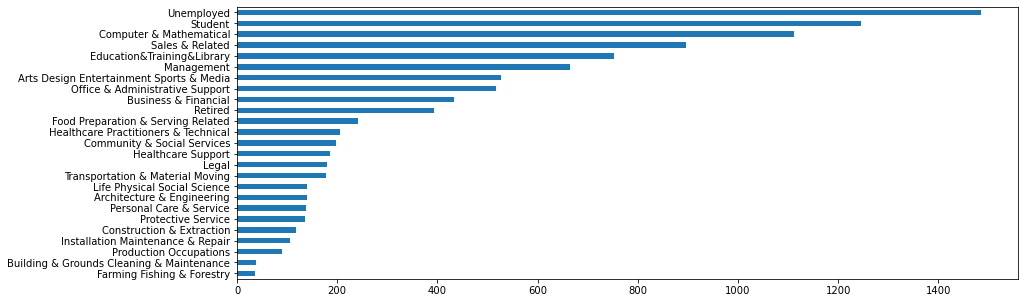

In [18]:
# checking feature occupation, it has 25 unique categories

train_data.occupation.value_counts().sort_values(ascending=True).plot.barh(figsize=(14,5))

In [19]:
import seaborn as sns
# Check the outliers based on coupon usage in occupation
occu = train_data[train_data['Y']==1]['occupation'].value_counts()
print(occu.sum())
occu

5768


Unemployed                                   806
Student                                      765
Computer & Mathematical                      638
Sales & Related                              498
Education&Training&Library                   391
Management                                   388
Office & Administrative Support              307
Arts Design Entertainment Sports & Media     280
Business & Financial                         249
Retired                                      184
Food Preparation & Serving Related           144
Healthcare Practitioners & Technical         139
Healthcare Support                           130
Transportation & Material Moving             108
Community & Social Services                   98
Architecture & Engineering                    89
Legal                                         84
Construction & Extraction                     82
Protective Service                            82
Personal Care & Service                       78
Life Physical Social

<AxesSubplot:>

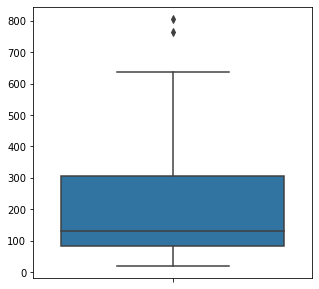

In [20]:
plt.figure(figsize=(5,5))
sns.boxplot(data=occu,y=occu.values)

<AxesSubplot:ylabel='Density'>

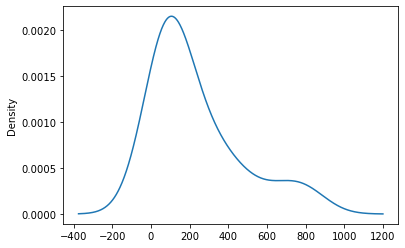

In [21]:
occu.plot.kde()

In [22]:
occu_outlier = ['Unemployed','Student','Computer & Mathematical','Sales & Related','Education&Training&Library',\
                'Management','Office & Administrative Support','Arts Design Entertainment Sports & Media',\
                'Business & Financial','Retired']
train_data['occupation'] = train_data['occupation'].apply(lambda v: 'others' if v not in occu_outlier else v)
test_data['occupation'] = test_data['occupation'].apply(lambda v: 'others' if v not in occu_outlier else v)
train_data.occupation.value_counts()

others                                      2122
Unemployed                                  1485
Student                                     1245
Computer & Mathematical                     1111
Sales & Related                              896
Education&Training&Library                   753
Management                                   665
Arts Design Entertainment Sports & Media     526
Office & Administrative Support              517
Business & Financial                         433
Retired                                      394
Name: occupation, dtype: int64

5768


<AxesSubplot:>

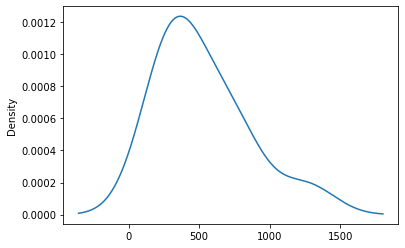

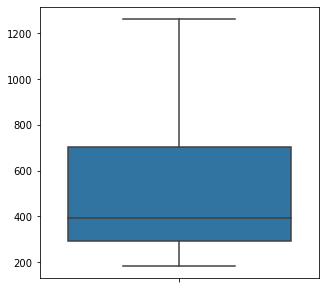

In [24]:
# Removed the Skewness and outliers
occu = train_data[train_data['Y']==1]['occupation'].value_counts()
print(occu.sum())
occu.plot.kde()
plt.figure(figsize=(5,5))
sns.boxplot(data=occu,y=occu.values)

In [25]:
train_data.describe(include = 'object')

,destination,passanger,weather,coupon,expiration,gender,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147
unique,3,4,3,5,2,2,5,6,11,9,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,Coffee House,1d,Female,Married partner,Bachelors degree,others,$25000 - $37499,never,less1,1~3,1~3,less1
freq,5045,5802,8015,3191,5643,5204,4086,3511,2122,1622,4238,2868,3863,4393,5037


<AxesSubplot:>

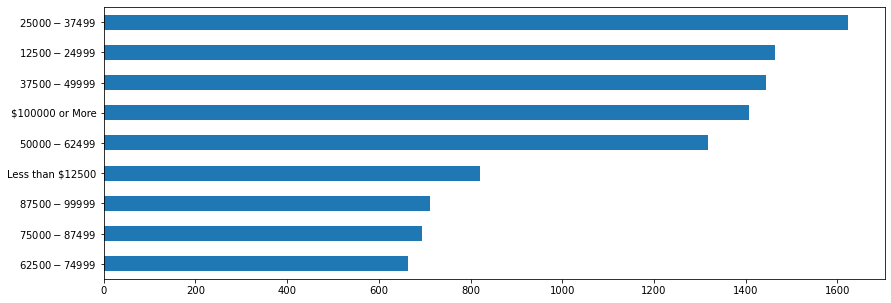

In [26]:
# Income column analysis
train_data.income.value_counts().sort_values(ascending=True).plot.barh(figsize=(14,5))

In [27]:
# Analyze Income brackets for positive results
income = train_data[train_data['Y']==1]['income'].value_counts()
print(income.sum())
income

5768


$25000 - $37499     966
$12500 - $24999     848
$100000 or More     822
$37500 - $49999     809
$50000 - $62499     787
Less than $12500    480
$87500 - $99999     371
$62500 - $74999     356
$75000 - $87499     329
Name: income, dtype: int64

<AxesSubplot:>

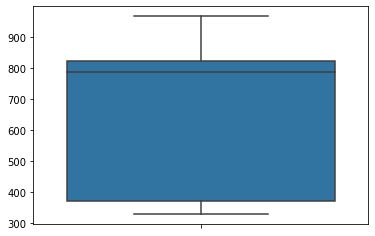

In [28]:
sns.boxplot(data=income,y=income.values)

<AxesSubplot:ylabel='Density'>

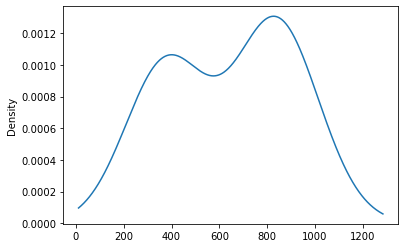

In [29]:
income.plot.kde()

In [30]:
# Income bracket does not have outliers, however the data skewness is left skewed
income.skew()

-0.20304477193411624

In [31]:
# Gender Analysis
train_data.gender.value_counts().sort_values(ascending=False)

Female    5204
Male      4943
Name: gender, dtype: int64

In [32]:
gender = train_data[train_data['Y']==1]['gender'].value_counts()
print(gender.sum())
gender

5768


Male      2915
Female    2853
Name: gender, dtype: int64

<AxesSubplot:>

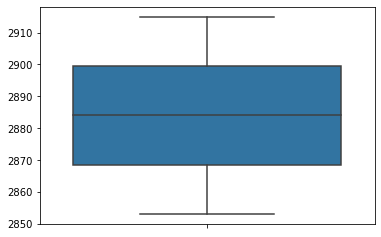

In [33]:
sns.boxplot(data=gender,y=gender.values)

<AxesSubplot:ylabel='Density'>

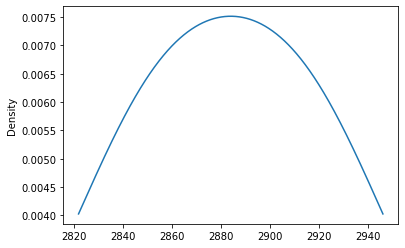

In [34]:
gender.plot.kde()

<AxesSubplot:>

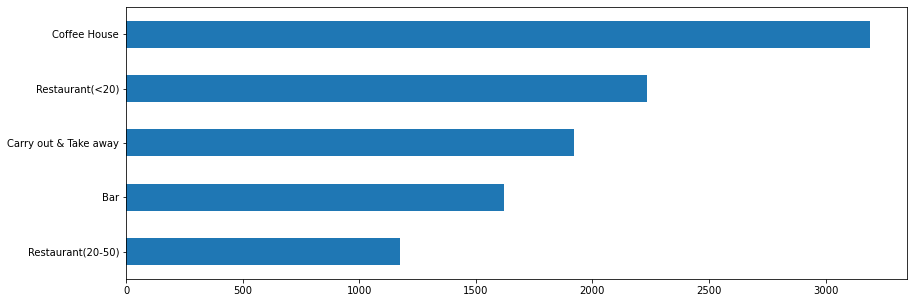

In [35]:
# Analyse Coupons
train_data.coupon.value_counts().sort_values(ascending=True).plot.barh(figsize=(14,5))

In [36]:
coupon = train_data[train_data['Y']==1]['coupon'].value_counts()
print(coupon.sum())
coupon

5768


Coffee House             1600
Restaurant(<20)          1575
Carry out & Take away    1414
Bar                       664
Restaurant(20-50)         515
Name: coupon, dtype: int64

<AxesSubplot:>

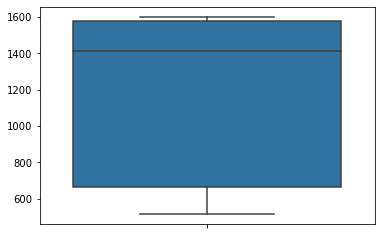

In [37]:
sns.boxplot(data=coupon,y=coupon.values)

<AxesSubplot:ylabel='Density'>

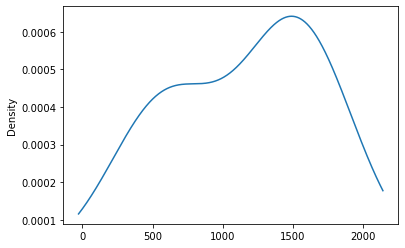

In [38]:
coupon.plot.kde()

In [39]:
coupon.skew()

-0.5734002084393751

<AxesSubplot:>

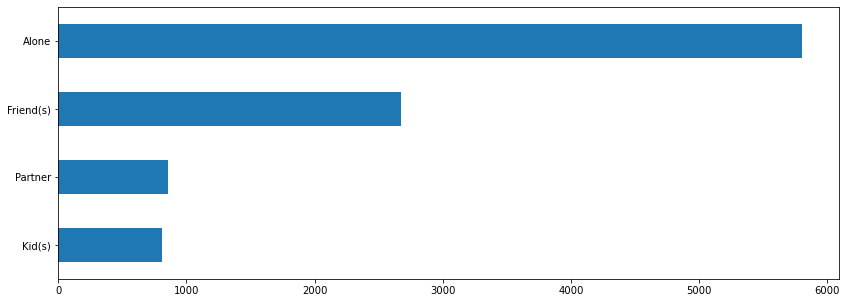

In [40]:
# Analyze passanger
train_data.passanger.value_counts().sort_values(ascending=True).plot.barh(figsize=(14,5))

In [41]:
passanger = train_data[train_data['Y']==1]['passanger'].value_counts()
print(passanger.sum())
passanger

5768


Alone        3049
Friend(s)    1800
Partner       510
Kid(s)        409
Name: passanger, dtype: int64

<AxesSubplot:>

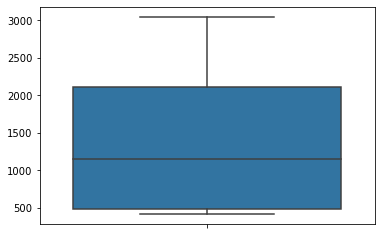

In [42]:
sns.boxplot(data=passanger,y=passanger.values)

<AxesSubplot:ylabel='Density'>

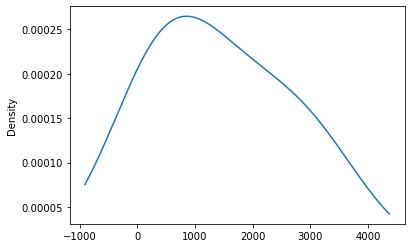

In [43]:
passanger.plot.kde()

In [44]:
passanger.skew()

0.7899972523633265

<AxesSubplot:>

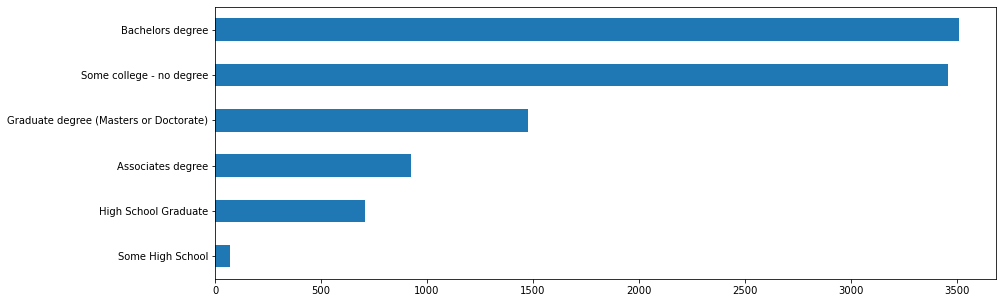

In [45]:
#Education Analysis
train_data.education.value_counts().sort_values(ascending=True).plot.barh(figsize=(14,5))

In [46]:
education = train_data[train_data['Y']==1]['education'].value_counts()
print(education.sum())
education

5768


Some college - no degree                  2069
Bachelors degree                          1948
Graduate degree (Masters or Doctorate)     781
Associates degree                          505
High School Graduate                       412
Some High School                            53
Name: education, dtype: int64

<AxesSubplot:>

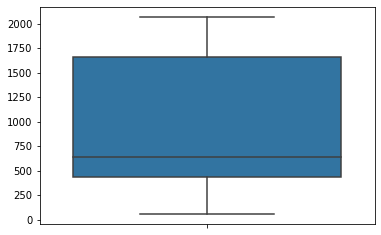

In [47]:
sns.boxplot(data=education,y=education.values)

<AxesSubplot:ylabel='Density'>

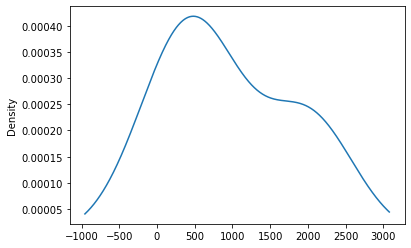

In [48]:
education.plot.kde()

In [49]:
education.skew()

0.6486777732125808

<AxesSubplot:>

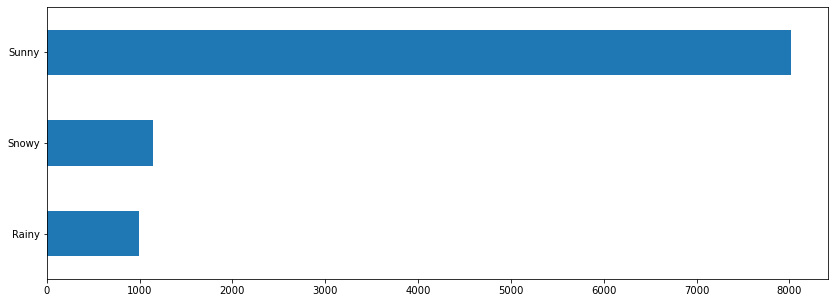

In [50]:
# Weather Analysis
train_data.weather.value_counts().sort_values(ascending=True).plot.barh(figsize=(14,5))

In [51]:
weather = train_data[train_data['Y']==1]['weather'].value_counts()
print(weather.sum())
weather

5768


Sunny    4757
Snowy     546
Rainy     465
Name: weather, dtype: int64

<AxesSubplot:>

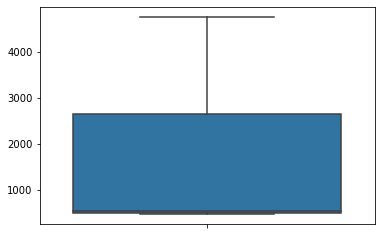

In [52]:
sns.boxplot(data=weather,y=weather.values)

<AxesSubplot:ylabel='Density'>

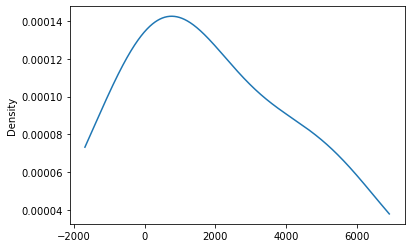

In [53]:
weather.plot.kde()

In [54]:
weather.skew()

1.7299297492720773

<AxesSubplot:>

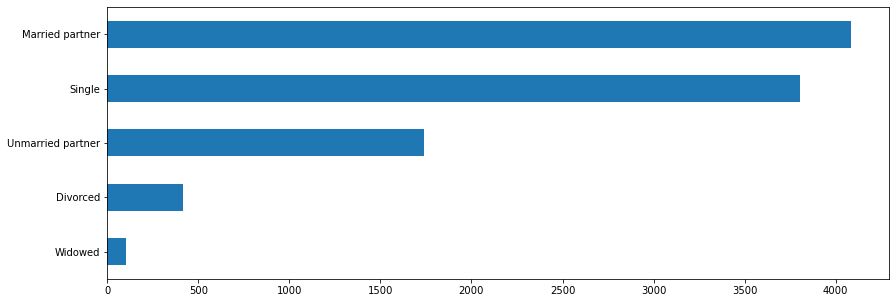

In [55]:
# Analyze maritalStatus
train_data.maritalStatus.value_counts().sort_values(ascending=True).plot.barh(figsize=(14,5))

In [56]:
maritalStatus = train_data[train_data['Y']==1]['maritalStatus'].value_counts()
print(maritalStatus.sum())
maritalStatus

5768


Single               2296
Married partner      2224
Unmarried partner     968
Divorced              232
Widowed                48
Name: maritalStatus, dtype: int64

<AxesSubplot:>

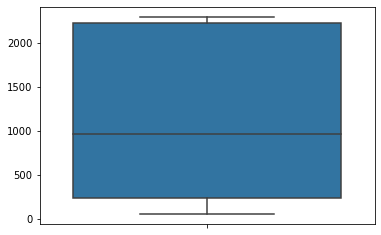

In [57]:
sns.boxplot(data=maritalStatus,y=maritalStatus.values)

<AxesSubplot:ylabel='Density'>

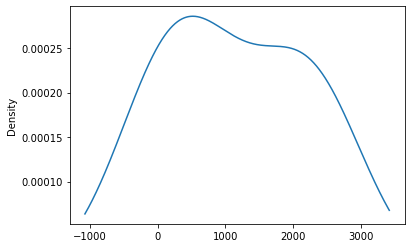

In [58]:
maritalStatus.plot.kde()

In [59]:
maritalStatus.skew()

0.1976308791571414

In [60]:
train_data.describe(include = 'object')

,destination,passanger,weather,coupon,expiration,gender,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147
unique,3,4,3,5,2,2,5,6,11,9,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,Coffee House,1d,Female,Married partner,Bachelors degree,others,$25000 - $37499,never,less1,1~3,1~3,less1
freq,5045,5802,8015,3191,5643,5204,4086,3511,2122,1622,4238,2868,3863,4393,5037


<AxesSubplot:>

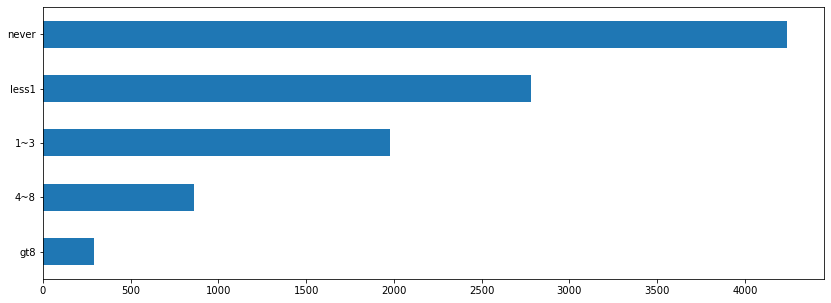

In [61]:
# Analyze Bar
train_data.Bar.value_counts().sort_values(ascending=True).plot.barh(figsize=(14,5))

In [62]:
bar = train_data[train_data['Y']==1]['Bar'].value_counts()
print(bar.sum())
bar

5768


never    2241
less1    1576
1~3      1227
4~8       556
gt8       168
Name: Bar, dtype: int64

<AxesSubplot:>

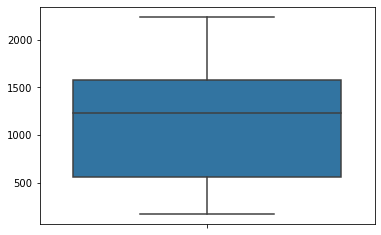

In [63]:
sns.boxplot(data=bar,y=bar.values)

<AxesSubplot:ylabel='Density'>

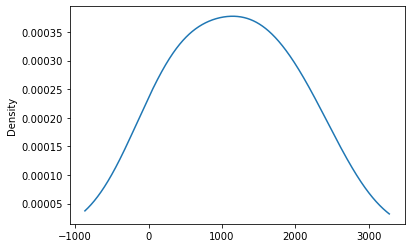

In [64]:
bar.plot.kde()

In [65]:
bar.skew()

0.14370130208924572

<AxesSubplot:>

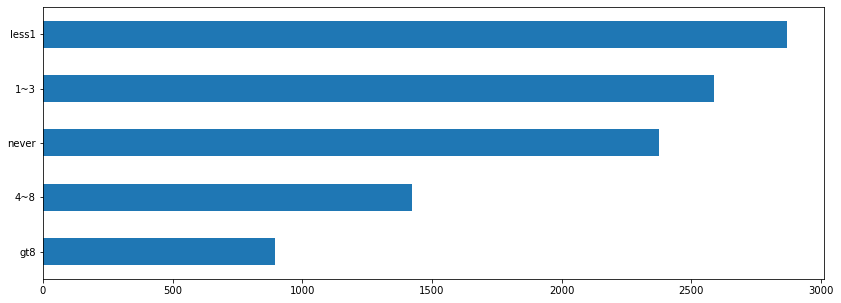

In [66]:
# Analyze CoffeeHouse
train_data.CoffeeHouse.value_counts().sort_values(ascending=True).plot.barh(figsize=(14,5))

In [67]:
CoffeeHouse = train_data[train_data['Y']==1]['CoffeeHouse'].value_counts()
print(CoffeeHouse.sum())
CoffeeHouse

5768


1~3      1691
less1    1594
never    1074
4~8       889
gt8       520
Name: CoffeeHouse, dtype: int64

<AxesSubplot:>

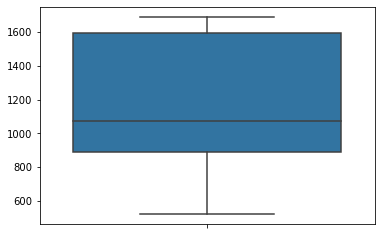

In [68]:
sns.boxplot(data=CoffeeHouse,y=CoffeeHouse.values)

<AxesSubplot:ylabel='Density'>

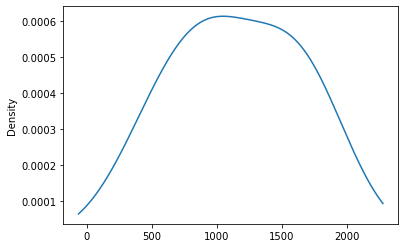

In [69]:
CoffeeHouse.plot.kde()

In [70]:
CoffeeHouse.skew()

-0.11603470770618135

<AxesSubplot:>

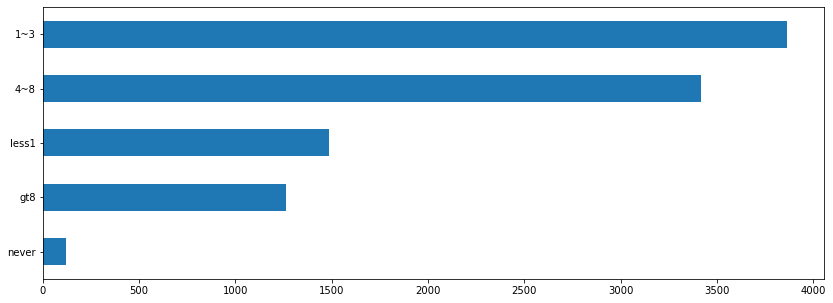

In [71]:
# Analyze CarryAway
train_data.CarryAway.value_counts().sort_values(ascending=True).plot.barh(figsize=(14,5))

In [72]:
CarryAway = train_data[train_data['Y']==1]['CarryAway'].value_counts()
print(CarryAway.sum())
CarryAway

5768


1~3      2244
4~8      1980
less1     748
gt8       735
never      61
Name: CarryAway, dtype: int64

<AxesSubplot:>

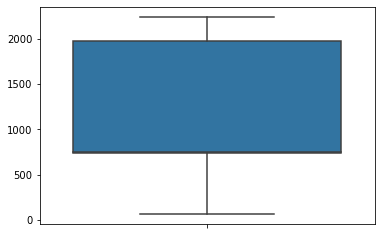

In [73]:
sns.boxplot(data=CarryAway,y=CarryAway.values)

<AxesSubplot:ylabel='Density'>

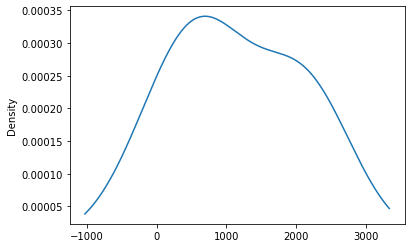

In [74]:
CarryAway.plot.kde()

In [75]:
CarryAway.skew()

0.22088977238793162

In [76]:
train_data.describe()

,customer_id,temperature,time,age,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,10147.000000,10147.000000,10147.000000,10147.000000,10147.000000,10147.0,10147.000000,10147.000000,10147.000000,10147.000000,10147.000000
mean,311272.276831,63.172366,13.802700,32.434710,0.412634,1.0,0.563024,0.119838,0.212181,0.787819,0.568444
std,106781.701016,19.232595,5.401365,10.428837,0.492332,0.0,0.496037,0.324788,0.408872,0.408872,0.495318
min,123472.000000,30.000000,7.000000,20.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,221439.000000,55.000000,10.000000,21.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,310062.000000,80.000000,14.000000,31.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,401537.000000,80.000000,18.000000,41.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,499988.000000,80.000000,22.000000,51.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='temperature'>

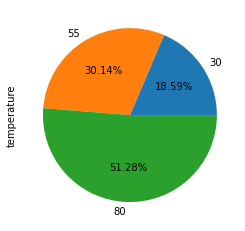

In [77]:
#Customer ID is a unique column so we will remove the column while training the Model
# Distribution of numerical columns
train_data.temperature.value_counts().sort_values(ascending=True).plot.pie(autopct = '%.2f%%')

<AxesSubplot:ylabel='time'>

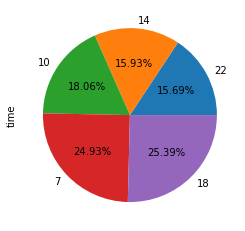

In [78]:
train_data.time.value_counts().sort_values(ascending=True).plot.pie(autopct = '%.2f%%')

<AxesSubplot:>

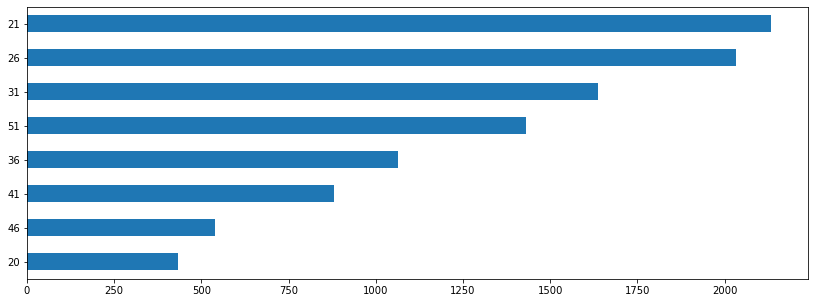

In [79]:
train_data.age.value_counts().sort_values(ascending=True).plot.barh(figsize=(14,5))

<AxesSubplot:ylabel='has_children'>

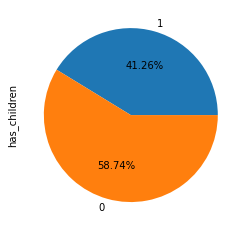

In [80]:
train_data.has_children.value_counts().sort_values(ascending=True).plot.pie(autopct='%.2f%%')

<AxesSubplot:ylabel='direction_opp'>

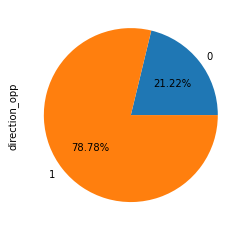

In [81]:
train_data.direction_opp.value_counts().sort_values(ascending=True).plot.pie(autopct='%.2f%%')

<AxesSubplot:ylabel='direction_same'>

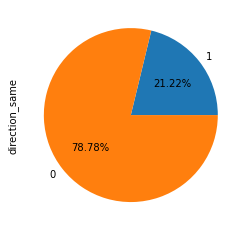

In [82]:
train_data.direction_same.value_counts().sort_values(ascending=True).plot.pie(autopct='%.2f%%')

In [83]:
#Bi-Variate Analysis 
# Destination Vs Coupon Use column Y
destination_Y = pd.crosstab(index = train_data['destination'], columns = train_data['Y'])
destination_Y

Y,0,1
destination,,
Home,1273,1299
No Urgent Place,1847,3198
Work,1259,1271


<Figure size 1008x360 with 0 Axes>

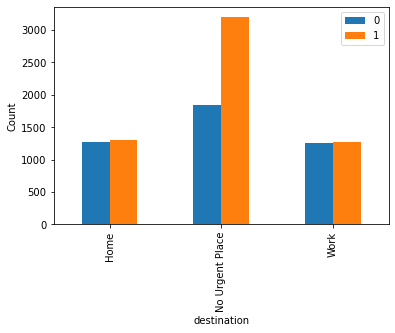

In [84]:
plt.figure(figsize=(14,5))
destination_Y.plot.bar()
plt.ylabel("Count")
plt.legend()

In [85]:
# Has Children Vs Coupon Use column Y
has_children_Y = pd.crosstab(index = train_data['has_children'], columns = train_data['Y'])
has_children_Y

Y,0,1
has_children,,
0,2471,3489
1,1908,2279


<Figure size 1008x360 with 0 Axes>

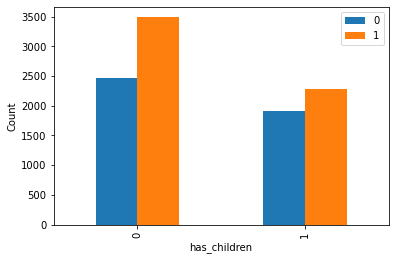

In [86]:
plt.figure(figsize=(14,5))
has_children_Y.plot.bar()
plt.ylabel("Count")
plt.legend()

In [87]:
# Age Vs Coupon Use column Y
age_Y = pd.crosstab(index = train_data['age'], columns = train_data['Y'])
age_Y

Y,0,1
age,,
20,164,268
21,862,1271
26,817,1216
31,751,885
36,495,570
41,363,516
46,235,303
51,692,739


<Figure size 1008x360 with 0 Axes>

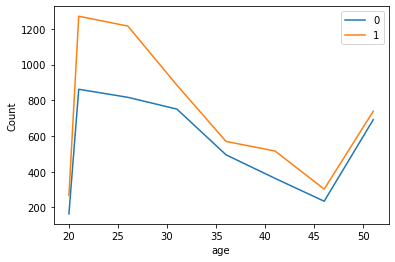

In [88]:
plt.figure(figsize=(14,5))
age_Y.plot()
plt.ylabel("Count")
plt.legend()

In [89]:
# time Vs Coupon Use column Y
time_Y = pd.crosstab(index = train_data['time'], columns = train_data['Y'])
time_Y

Y,0,1
time,,
7,1259,1271
10,704,1129
14,557,1059
18,1076,1500
22,783,809


<Figure size 1008x360 with 0 Axes>

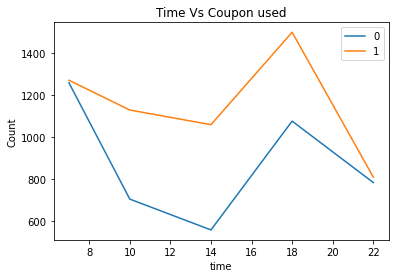

In [90]:
plt.figure(figsize=(14,5))
time_Y.plot()
plt.title("Time Vs Coupon used")
plt.ylabel("Count")
plt.legend()

In [91]:
# Multivariate comparison toCoupon_GEQ5min,toCoupon_GEQ15min and toCoupon_GEQ25min
t_Y = pd.crosstab(index = train_data['Y'], columns = train_data['toCoupon_GEQ5min'])
# t1_Y = pd.crosstab(index = train_data['Y'], columns = train_data['toCoupon_GEQ15min'])
# t2_Y = pd.crosstab(index = train_data['Y'], columns = train_data['toCoupon_GEQ25min'])
# t_Y = pd.crosstab(index = train_data['toCoupon_GEQ5min'], columns = train_data['Y'])
t1_Y = pd.crosstab(index = train_data['toCoupon_GEQ15min'], columns = train_data['Y'])
t2_Y = pd.crosstab(index = train_data['toCoupon_GEQ25min'], columns = train_data['Y'])

<Figure size 1008x360 with 0 Axes>

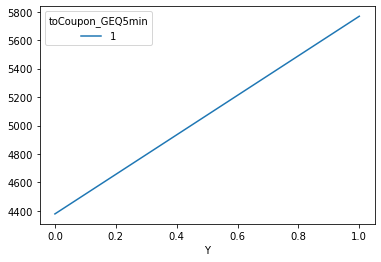

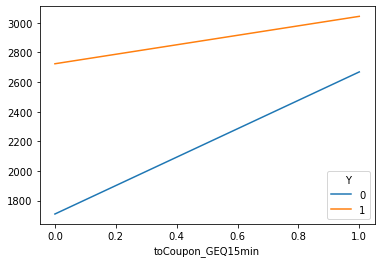

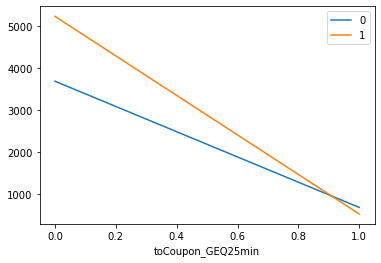

In [92]:
plt.figure(figsize=(14,5))
t_Y.plot()
t1_Y.plot()
t2_Y.plot()
plt.legend()

In [93]:
# toCoupon_GEQ5min is single value through out hence the column can be dropped
train_data.drop(columns = 'toCoupon_GEQ5min', inplace=True)
test_data.drop(columns = 'toCoupon_GEQ5min', inplace=True)

In [94]:
# Occupation Vs Coupon Use
occu_Y = pd.crosstab(index = train_data['occupation'], columns = train_data['Y'])
occu_Y

Y,0,1
occupation,,
Arts Design Entertainment Sports & Media,246,280
Business & Financial,184,249
Computer & Mathematical,473,638
Education&Training&Library,362,391
Management,277,388
Office & Administrative Support,210,307
Retired,210,184
Sales & Related,398,498
Student,480,765


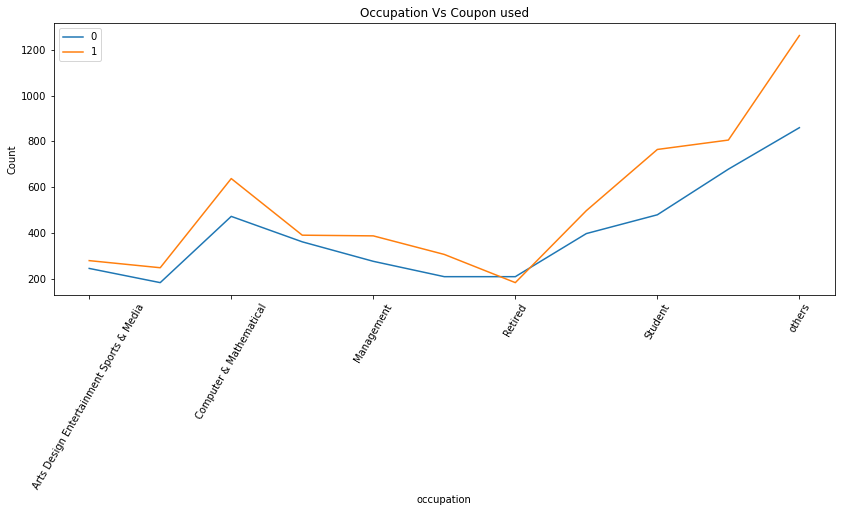

In [95]:
occu_Y.plot(figsize=(14,5))
plt.title("Occupation Vs Coupon used")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.legend()
plt.show()

In [96]:
# Multivariate Analysis
train_data.pivot_table(index = 'occupation', values='customer_id',columns=['age','Y'],aggfunc="count")

age                                          20            21            26  \
Y                                             0      1      0      1      0   
occupation                                                                    
Arts Design Entertainment Sports & Media    NaN    NaN   31.0   64.0   31.0   
Business & Financial                        NaN    NaN   27.0   26.0   21.0   
Computer & Mathematical                     NaN    NaN   34.0   84.0  125.0   
Education&Training&Library                 11.0    7.0   45.0   28.0   30.0   
Management                                  NaN    NaN   33.0   57.0   72.0   
Office & Administrative Support             NaN    NaN   22.0   36.0   79.0   
Retired                                     NaN    NaN    NaN    NaN   12.0   
Sales & Related                             NaN    NaN  101.0  134.0   97.0   
Student                                   124.0  243.0  267.0  444.0   17.0   
Unemployed                                 10.0    6.0  169.0  248.0  168.0   
others                                     19.0   12.0  133.0  150.0  165.0   

age                                                 31            36         \
Y                                             1      0      1      0      1   
occupation                                                                    
Arts Design Entertainment Sports & Media   21.0   70.0   57.0   14.0   23.0   
Business & Financial                       46.0   26.0   31.0   24.0   46.0   
Computer & Mathematical                   187.0  179.0  160.0   79.0   95.0   
Education&Training&Library                 71.0   53.0   69.0   83.0   66.0   
Management                                 96.0   42.0   41.0   27.0   36.0   
Office & Administrative Support           101.0   40.0   41.0   12.0   27.0   
Retired                                     5.0    NaN    NaN    3.0   11.0   
Sales & Related                            84.0   49.0  116.0   35.0   37.0   
Student                                    33.0   34.0   32.0   27.0    7.0   
Unemployed                                260.0   87.0   96.0  104.0   57.0   
others                                    312.0  171.0  242.0   87.0  165.0   

age                                         41           46           51  \
Y                                            0      1     0     1      0   
occupation                                                                 
Arts Design Entertainment Sports & Media  54.0   68.0  16.0  22.0   30.0   
Business & Financial                      55.0   65.0  18.0  15.0   13.0   
Computer & Mathematical                   23.0   59.0   9.0  19.0   24.0   
Education&Training&Library                50.0   53.0   3.0  13.0   87.0   
Management                                18.0   59.0  52.0  60.0   33.0   
Office & Administrative Support           21.0   34.0  10.0  22.0   26.0   
Retired                                    NaN    NaN  11.0  12.0  184.0   
Sales & Related                           31.0   37.0  33.0  37.0   52.0   
Student                                    NaN    NaN  11.0   6.0    NaN   
Unemployed                                37.0   39.0  18.0  26.0   86.0   
others                                    74.0  102.0  54.0  71.0  157.0   

age                                              
Y                                             1  
occupation                                       
Arts Design Entertainment Sports & Media   25.0  
Business & Financial                       20.0  
Computer & Mathematical                    34.0  
Education&Training&Library                 84.0  
Management                                 39.0  
Office & Administrative Support            46.0  
Retired                                   156.0  
Sales & Related                            53.0  
Student                                     NaN  
Unemployed                                 74.0  
others                                    208.0

In [97]:
# we can see that Age group in student, Unemployed and Retired (it is clubbed in others under age 50+)
# have a good positive coupon use rate

In [98]:
train_data.pivot_table(index = 'coupon', values='customer_id',columns=['Y'],aggfunc="count")

Y,0,1
coupon,,
Bar,959,664
Carry out & Take away,509,1414
Coffee House,1591,1600
Restaurant(20-50),662,515
Restaurant(<20),658,1575


In [99]:
# converting categorical columns to Numerical column
train_dummies = pd.get_dummies(train_data)
test_dummies = pd.get_dummies(test_data)

In [100]:
train_dummies.shape

(10147, 85)

In [101]:
# Correlation of the current numeric columns
train_dummies.corr().style.background_gradient()


In [102]:
# from the above correlation Age, has_children, oCoupon_GEQ15min, toCoupon_GEQ25min, direction_same and direction_opp 
# have significance in both positive and negative side of correlation.
# Customer ID, temperature and time columns can be removed from the Model

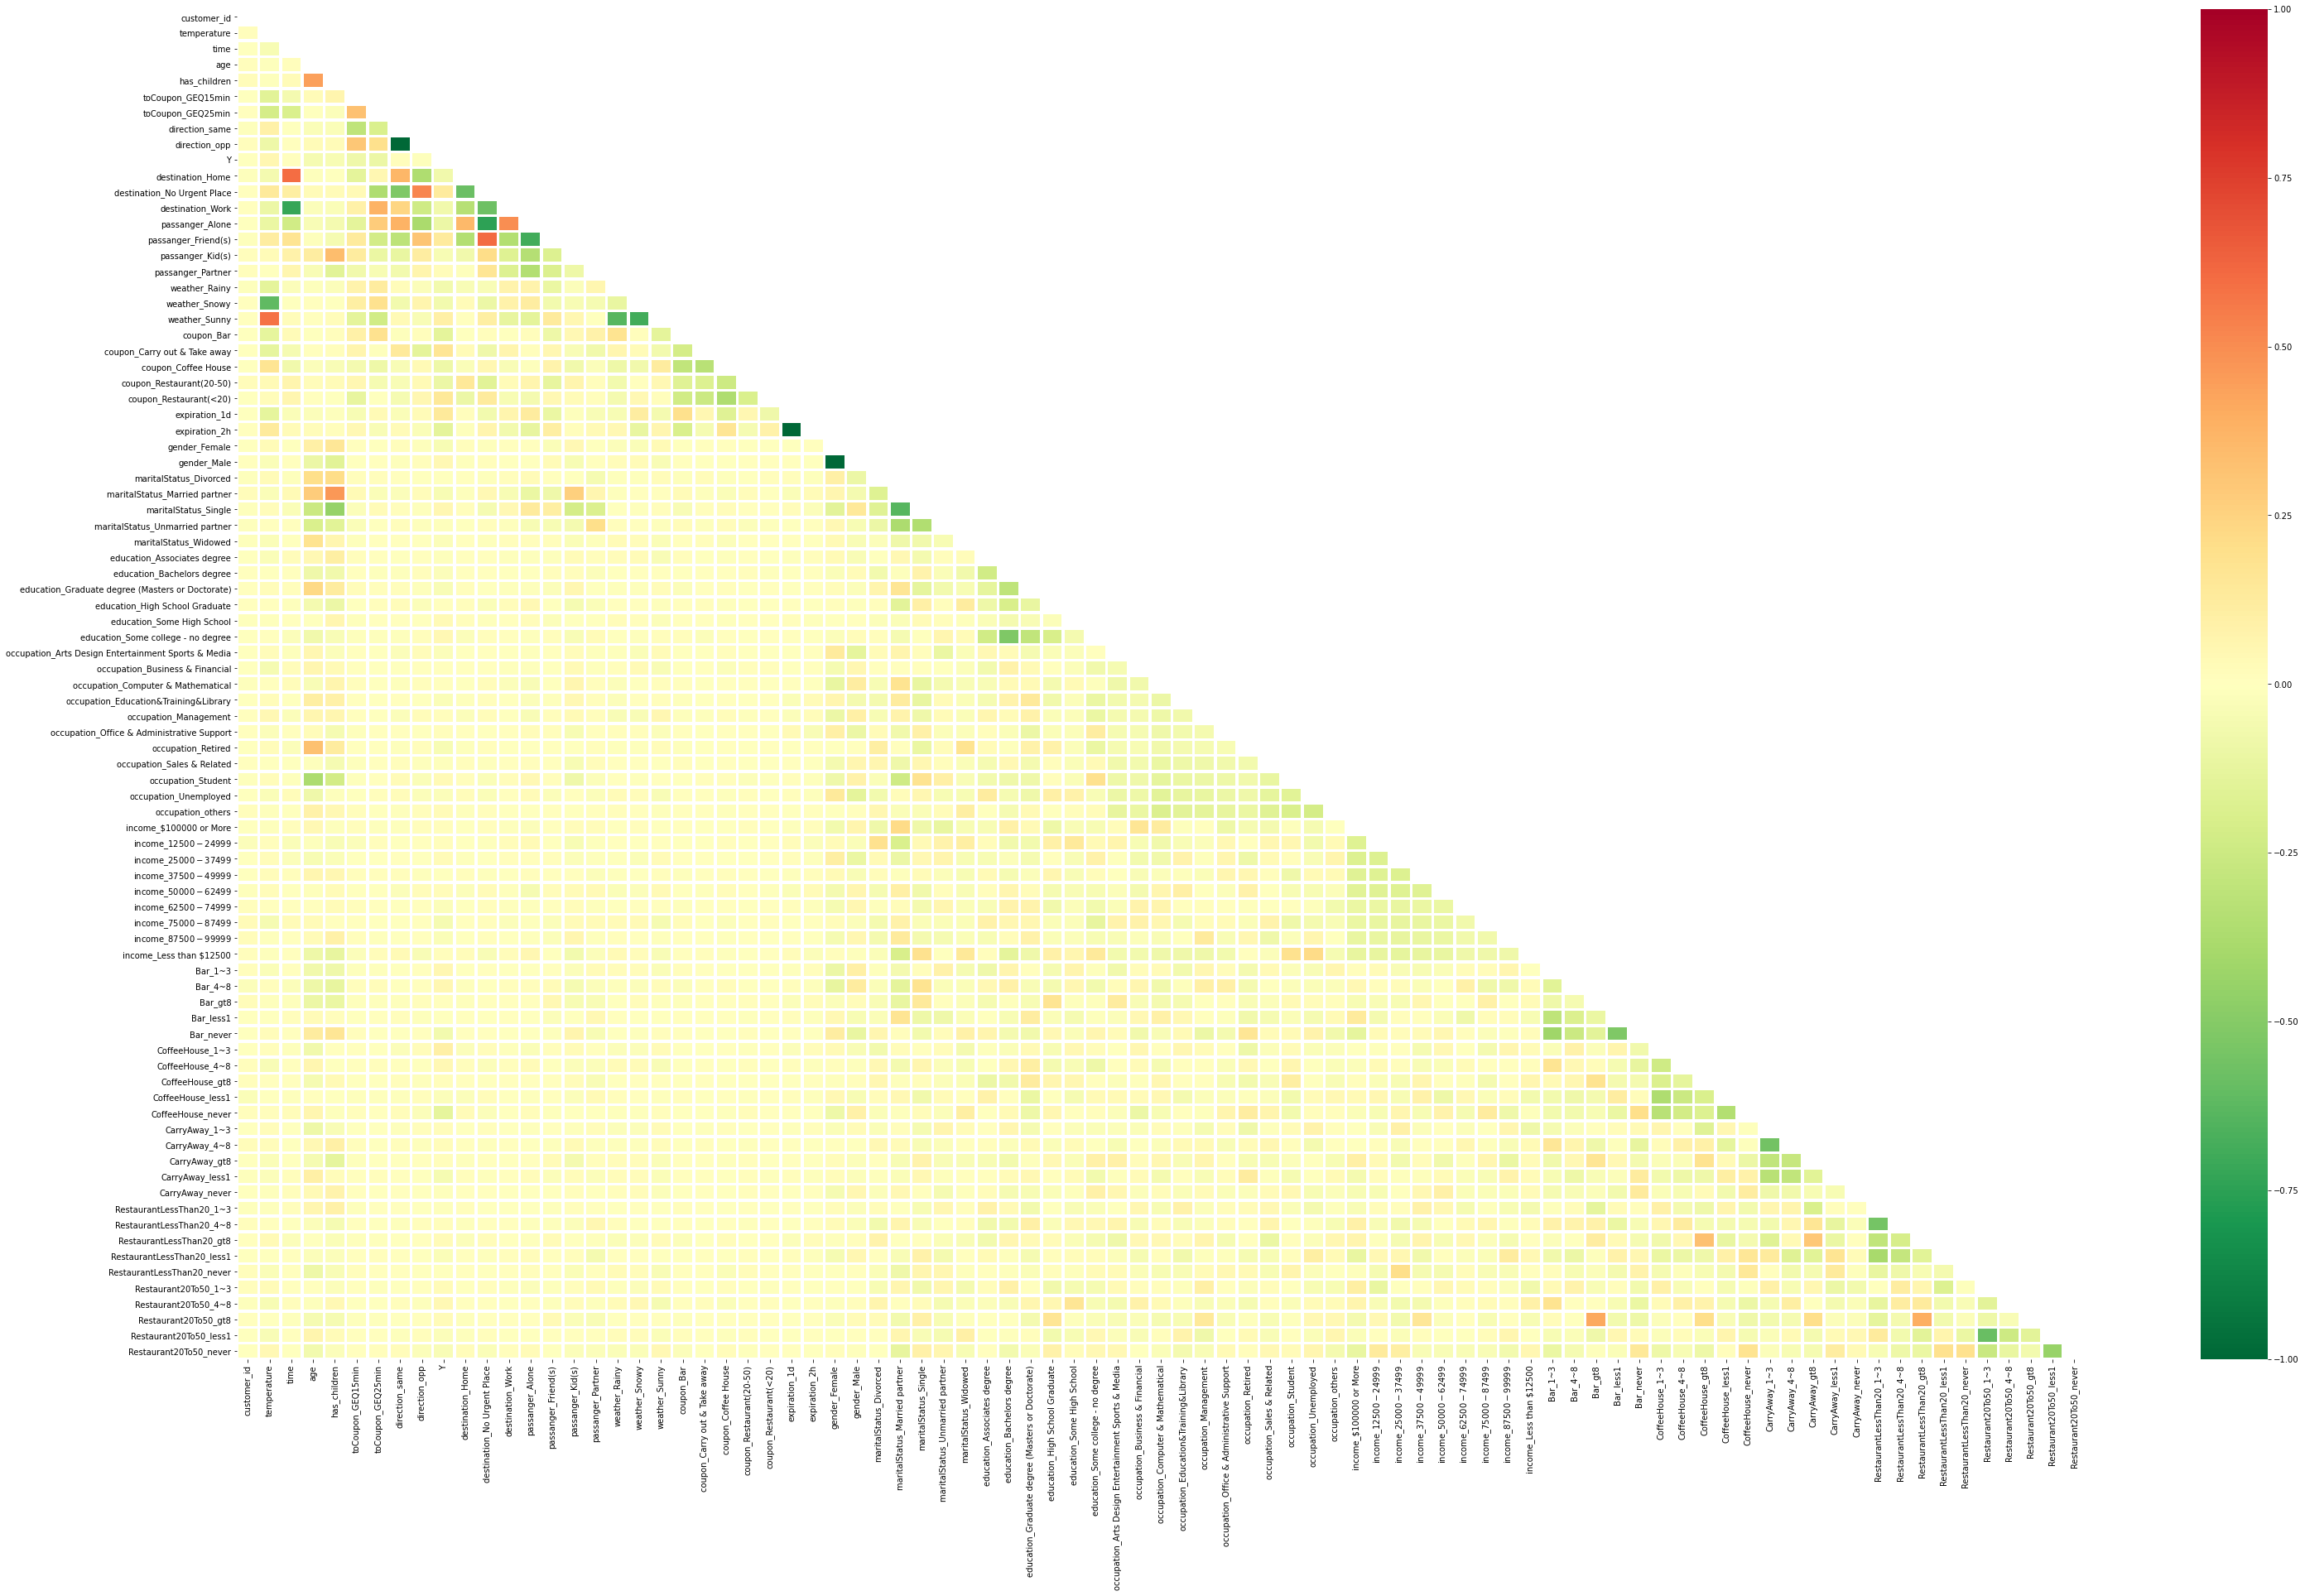

In [103]:
# Check Multicollinearity relations ship between variables using pearson method
corr = train_dummies.corr(method='pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (50,30))
sns.heatmap(corr, cmap = 'RdYlGn_r', vmax = 1.0, vmin = -1.0, mask=mask,linewidths=2.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.savefig('Multicollinearity.png')

In [104]:
# In the above analysis we have used the pearson method hence the values which are in between -1 and 1, hence all the
# columns with 0 values can be removed based on the collinear relationship
# Based on the analysis, we can remove the columns 'customer_id', 'temperature', 'time',
#        'weather_Rainy','weather_Snowy', 'weather_Sunny'

In [105]:
#Dropping the columns as indentified during Correlation analysis
train_dummies.drop(columns = ['customer_id','temperature','time','weather_Rainy','weather_Snowy','weather_Sunny'],inplace=True)
test_dummies.drop(columns = ['customer_id','temperature','time','weather_Rainy','weather_Snowy','weather_Sunny'],inplace=True)

In [106]:
# Splitting the data in to feature and Target column
X = train_dummies.drop(columns = 'Y').copy()
y = train_dummies['Y']
print(X.shape,y.shape)

(10147, 78) (10147,)


## Logistic Regression Model

In [107]:
#import Logistic regression and cross validation library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate

In [108]:
# Instantiate and use Cross Validation score to get the scores for training data
model = LogisticRegression(max_iter=1000)
cross_score = cross_val_score(model,X,y,cv=5,scoring='accuracy')
cross_score

array([0.68275862, 0.67142857, 0.68408083, 0.67028093, 0.69048793])

In [109]:
avg_score = np.mean(cross_score)
print("The accuracy score of the model using logistic regression is: ",avg_score)

The accuracy score of the model using logistic regression is:  0.6798073743526744


In [110]:
X_cv_lr_results = cross_validate(model,X,y,cv=5,return_train_score=True)
X_cv_lr_results

{'fit_time': array([0.23836184, 0.3141613 , 0.35006452, 0.31814957, 0.27925396]),
 'score_time': array([0.00498557, 0.00499845, 0.00498533, 0.00399494, 0.0039885 ]),
 'test_score': array([0.68275862, 0.67142857, 0.68408083, 0.67028093, 0.69048793]),
 'train_score': array([0.68547493, 0.68683011, 0.68440503, 0.68883962, 0.68415866])}

In [111]:
model.fit(X,y)

LogisticRegression(max_iter=1000)

In [112]:
y_test = model.predict(test_dummies)
y_test

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [113]:
columnid = test_data[['customer_id']]

In [114]:
submit = pd.DataFrame(np.hstack((columnid,y_test.reshape(-1,1))),columns = ['customer_id','Y'])
submit

,customer_id,Y
0,374679,1
1,469678,1
2,216140,1
3,184301,1
4,148720,1
...,...,...
2532,356045,0
2533,498759,1
2534,356159,0
2535,218541,0


In [115]:
submit.to_csv('sub12_lr.csv',index=False)

## Decision Tree Model

In [116]:
#instantiate the model
dt=DecisionTreeClassifier(random_state=80)
#Hyper tuning the parameters to find the relevant parameter
params = {'max_depth':list(range(1,21)), 'criterion':['gini', 'entropy']}
cv_model = GridSearchCV(dt, param_grid = params,cv=5,return_train_score=True)
cv_model.fit(X,y)
X_cv_dt_results = pd.DataFrame(cv_model.cv_results_)
print(cv_model.best_params_)

{'criterion': 'gini', 'max_depth': 11}


In [117]:
X_cv_dt_results[['params','mean_test_score']].sort_values(by='mean_test_score', ascending=False).head()

,params,mean_test_score
10,"{'criterion': 'gini', 'max_depth': 11}",0.703457
11,"{'criterion': 'gini', 'max_depth': 12}",0.699910
33,"{'criterion': 'entropy', 'max_depth': 14}",0.699714
8,"{'criterion': 'gini', 'max_depth': 9}",0.698334
9,"{'criterion': 'gini', 'max_depth': 10}",0.698236


In [119]:
model_dt = DecisionTreeClassifier(max_depth = 11, random_state=80)
cross_score_dt = cross_val_score(model_dt,X,y,cv=5,scoring='accuracy')
cross_score_dt

array([0.72167488, 0.70837438, 0.69886644, 0.70576639, 0.68260227])

In [120]:
avg_score_dt = np.mean(cross_score_dt)
print("The Accuracy score of Decision Tree is ",avg_score_dt)

The Accuracy score of Decision Tree is  0.7034568704523328


In [121]:
#create the prediction file and save it
model_dt.fit(X,y)
y_test_dt = model_dt.predict(test_dummies)
submit1 = pd.DataFrame(np.hstack((columnid,y_test_dt.reshape(-1,1))),columns=['customer_id','Y'])
submit1.to_csv('sub12_dt.csv',index=False)

In [122]:
y_test_dt

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

## Random Forest Tree Model

In [127]:
#instantiate the model
ft=RandomForestClassifier()
#Hyper tuning the parameters to find the relevant parameter
params = {'n_estimators':list(range(1,150))}
rs_ft = RandomizedSearchCV(estimator=ft,param_distributions=params,cv=5, return_train_score=True)
rs_ft.fit(X,y)
X_rscv_results = pd.DataFrame(rs_ft.cv_results_)

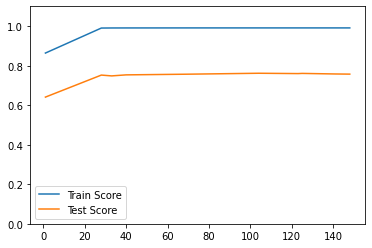

In [128]:
X_rscv_results = X_rscv_results.sort_values(by = 'param_n_estimators' )
plt.plot(X_rscv_results.param_n_estimators,X_rscv_results.mean_train_score,label='Train Score')
plt.plot(X_rscv_results.param_n_estimators,X_rscv_results.mean_test_score, label='Test Score')
plt.legend()
plt.ylim(0,1.1)
plt.show()

In [129]:
X_rscv_results.sort_values(by='mean_test_score', ascending=False)[['param_n_estimators','mean_test_score']].head()

,param_n_estimators,mean_test_score
0,104,0.761605
3,125,0.760816
7,123,0.759929
8,141,0.757958
1,148,0.757169


In [130]:
# from the above we can see that 104 estimators is optimum
params = {'n_estimators':list(range(2,120))}
ft = RandomForestClassifier()
gs_ft = GridSearchCV(estimator=ft,param_grid=params,cv=5, return_train_score=True)
gs_ft.fit(X,y)
X_cv_results = pd.DataFrame(gs_ft.cv_results_)

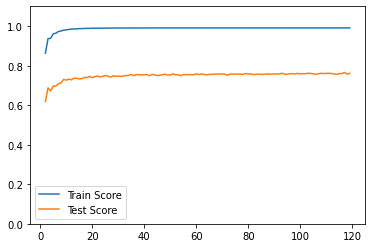

In [131]:
X_cv_results = X_cv_results.sort_values(by = 'param_n_estimators' )
plt.plot(X_cv_results.param_n_estimators,X_cv_results.mean_train_score,label='Train Score')
plt.plot(X_cv_results.param_n_estimators,X_cv_results.mean_test_score, label='Test Score')
plt.legend()
plt.ylim(0,1.1)
plt.show()

In [132]:
X_cv_results.sort_values(by='mean_test_score', ascending=False)[['param_n_estimators','mean_test_score']].head()

,param_n_estimators,mean_test_score
115,117,0.765940
101,103,0.761802
91,93,0.761702
106,108,0.761604
109,111,0.761210


In [133]:
gs_ft.best_params_

{'n_estimators': 117}

In [136]:
rf_model = RandomForestClassifier(n_estimators=137,random_state=80) 
cross_score_rf = cross_val_score(rf_model,X,y,cv=5,scoring='accuracy')
cross_score_rf.mean()
#When we execute with estimators as 117 we get accuracy score of 0.7598, hence we tried to execute using 137 which is 0.7617

0.761702700012382

In [137]:
rf_model.fit(X,y)
y_test_rf = rf_model.predict(test_dummies)
y_test_rf

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [ ]:
# acc_score_rf=X_cv_results[X_cv_results['param_n_estimators']==60]['mean_test_score'].values[0]

In [138]:
# X_cv_results.mean_test_score.max()
print("The accuracy score of the model using Random Forest is: ",cross_score_rf.mean())

The accuracy score of the model using Random Forest is:  0.761702700012382


In [139]:
# Save to file the result of the Random Forest
submit2 = pd.DataFrame(np.hstack((columnid,y_test_rf.reshape(-1,1))),columns=['customer_id','Y'])
submit2.to_csv('sub12_rf.csv',index=False)

Random Search

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

C:\Users\deepak\Softwares\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [4]:
dummies = pd.get_dummies(df).copy()

In [5]:
dummies.drop(columns=['expiration_2h', 'maritalStatus_Married partner', 'customer_id', 'direction_opp', 'age_below21', 'age_21', 'occupation_Retired', 'weather_Snowy', 'destination_No Urgent Place', 'time_7AM'], inplace = True)

In [6]:
target_cols = 'Y'
input_cols = dummies.columns.drop(target_cols)
X = dummies[input_cols]
y_train = dummies['Y']

In [7]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X)

In [8]:
params = {'n_estimators':list(range(3,400))}
estimator = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator = estimator, param_distributions=params, cv=5, return_train_score=True).fit(X_train, y_train)

In [10]:
#df_cv_results=pd.DataFrame(grid_search.cv_results_)
df_cv_results=pd.DataFrame(random_search.cv_results_)
df_cv_results = df_cv_results.sort_values(by='param_n_estimators')
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=179, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
df_cv_results[df_cv_results['param_n_estimators']==179]['mean_test_score']

4    0.766532
Name: mean_test_score, dtype: float64

In [12]:
test_data = pd.read_csv("test.csv")

In [13]:
test_data = test_data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [14]:
test_dummies = pd.get_dummies(test_data).copy()

In [15]:
cust_id = test_data[['customer_id']]

In [16]:
test_dummies.drop(columns=['expiration_2h', 'maritalStatus_Married partner', 'customer_id', 'direction_opp', 'age_below21', 'age_21', 'occupation_Retired', 'weather_Snowy', 'destination_No Urgent Place', 'time_7AM'], inplace = True)

In [17]:
y_pred = random_search.best_estimator_.predict(test_dummies)

In [18]:
prod_squad = pd.DataFrame(np.hstack((cust_id, y_pred.reshape(-1,1))), columns=['customer_id','Y'])
prod_squad.to_csv('Pro_Squad_sub9_rf.csv',index=False)

## Conclusion

In [140]:
# Accuracy score of Logistic Regeression Model
print("The Accuracy score of the model using logistic regression is: %.2f%%" % (avg_score*100))
# Accuracy score of Decision Tree Model
print("The Accuracy score of Decision Tree is: %.2f%%" % (avg_score_dt*100))
# Accuracy score of Random Forest Model
print("The Accuracy score of the model using Random Forest is: %.2f%%" % (cross_score_rf.mean()*100))

The Accuracy score of the model using logistic regression is: 67.98%
The Accuracy score of Decision Tree is: 70.35%
The Accuracy score of the model using Random Forest is: 76.17%


In [19]:
print("The Accuracy score of the model using Random Forest is: %.2f%%" % (df_cv_results[df_cv_results['param_n_estimators']==179]['mean_test_score']*100))

The Accuracy score of the model using Random Forest is: 76.65%
